## Dogs v Cats super-charged!

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

PATH = "data/fonts/data/"
sz=225
arch=resnet50
bs=28

In [5]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

100%|██████████| 53/53 [00:10<00:00,  5.14it/s]


In [6]:
learn.fit(1e-2, 1)
learn.precompute=False

[0.      1.15481 0.71157 0.78005]                            



In [7]:
learn.fit(1e-2, 2, cycle_len=1)

[0.      1.2134  0.76302 0.71496]                           
[1.      1.10731 0.74516 0.73491]                           



[0.      0.22419 0.34397 0.90431]                            
[1.      0.1964  0.44687 0.90162]                            
[2.      0.10067 0.37094 0.9124 ]                             
[3.      0.16112 0.55718 0.89892]                            
[4.      0.10575 0.39778 0.91846]                            
[5.      0.05159 0.31877 0.93733]                             
[6.      0.03887 0.28564 0.938  ]                             



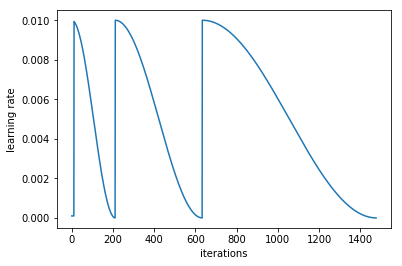

In [94]:
lr=np.array([1e-4,1e-3,1e-2])

learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

# Another trick we've used here is adding the `cycle_mult` parameter. Take a look at the following chart, and see if you can figure out what the parameter is doing:

learn.sched.plot_lr()

In [8]:
learn.unfreeze()
lr=np.array([1e-4,1e-3,1e-2])

In [9]:
learn.fit(lr, 3, cycle_len=1)

[0.      0.68628 0.56823 0.79973]                            
[1.      0.40734 0.62924 0.80337]                            
[2.      0.28682 0.46628 0.85175]                            



In [10]:
learn.save('224_all_50')

In [11]:
learn.load('224_all_50')

In [80]:
data.classes

['lato',
 'merriweather',
 'montserrat',
 'open-sans',
 'oswald',
 'raleway',
 'roboto']

## Analyzing results

In [95]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),0)

In [96]:
log_preds.shape, preds.shape

((5, 1476, 7), (1476, 7))

In [97]:
y.shape

(1476,)

In [98]:
preds = np.argmax(preds, axis=1)
# probs = probs[:,1]

In [99]:
cm = confusion_matrix(y, preds)

[[215   0   1   0   0   0   0]
 [  0  96   0   0   0   0   0]
 [  0   0 431   0   0   1   0]
 [  0   0   0 119   0   0   1]
 [  0   0   0   0 180   0   0]
 [  0   0   0   0   0 216   0]
 [  0   0   0   0   0   0 216]]


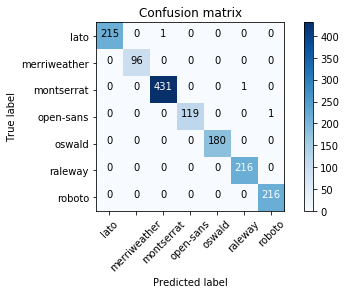

In [100]:
plot_confusion_matrix(cm, data.classes)